# Bagging – building an ensemble of classifiers from bootstrap samples
<html>
<ul>
<li>Bagging is an ensemble learning technique that is closely related to the MajorityVoteClassifier that we implemented in the previous section. </li>
<li>However, instead of using the same training set to fit the individual classifiers in the ensemble, we draw bootstrap samples (random samples with replacement) from the initial training set, which is why bagging is also known as bootstrap aggregating. </li>
<li>Bagging is also related to the random forest classifier. In fact, random forests are a special case of bagging where we also use random feature subsets to fit the individual decision trees.</li>
</ul>
</html>

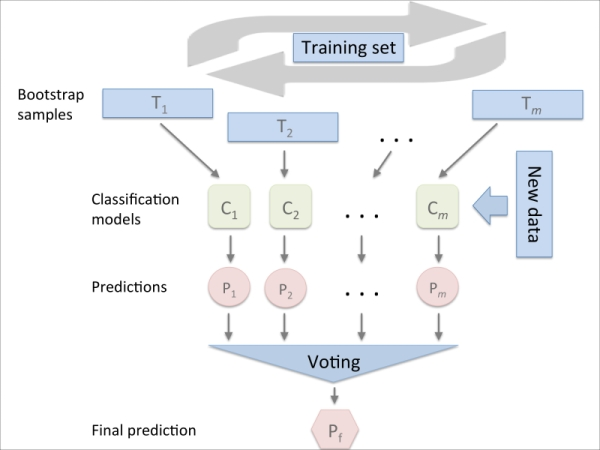

In [1]:
from IPython.display import Image
Image("/Users/surthi/gitrepos/ml-notes/images/bagging.jpg")

# Let's see bagging in action

In [6]:
import pandas as pd
import numpy as np
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
df_wine.columns = ['Class label', 'Alcohol', 
                   'Malic acid', 'Ash', 
                   'Alcalinity of ash', 
                   'Magnesium', 'Total phenols', 
                   'Flavanoids', 'Nonflavanoid phenols',
                   'Proanthocyanins', 
                   'Color intensity', 'Hue', 
                   'OD280/OD315 of diluted wines', 
                   'Proline']
df_wine = df_wine[df_wine['Class label'] != 1]
y = df_wine['Class label'].values
X = df_wine[['Alcohol', 'Hue']].values

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
le = LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=1)

In [10]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# tree score
tree = DecisionTreeClassifier(criterion='entropy', max_depth=None)
tree = tree.fit(X_train, y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)
tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print('Decision tree train/test accuracies %.3f/%.3f' % (tree_train, tree_test))

# bag score
bag = BaggingClassifier(base_estimator=tree, n_estimators=500, max_samples=1.0, max_features=1.0, bootstrap=True,
                 bootstrap_features=False, n_jobs=1, random_state=1)
bag = bag.fit(X_train, y_train)
y_train_pred = bag.predict(X_train)
y_test_pred = bag.predict(X_test)
bag_train = accuracy_score(y_train, y_train_pred)
bag_test = accuracy_score(y_test, y_test_pred)
print('Decision tree train/test accuracies %.3f/%.3f' % (bag_train, bag_test))



Decision tree train/test accuracies 1.000/0.854
Decision tree train/test accuracies 1.000/0.896


# Let's plot decision region now

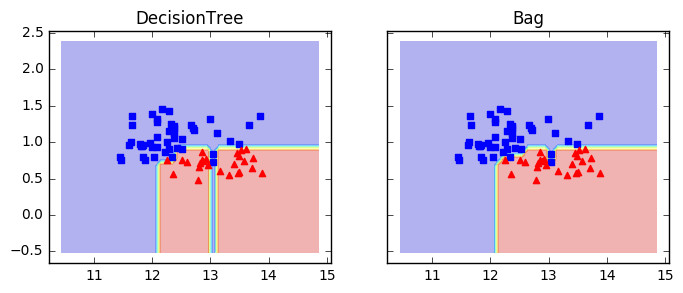

10.45 14.88 -0.52 2.45 (45,) (30,) (30, 45) (30, 45)


In [23]:
import matplotlib.pyplot as plt
x_min = X_train[:,0].min() - 1
x_max = X_train[:,0].max()  + 1
y_min = X_train[:,1].min() - 1
y_max = X_train[:,1].max()  + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
f, axarr = plt.subplots(nrows=1, ncols=2, sharex='col', sharey='row', figsize=(8, 3))
X_input = np.c_[xx.ravel(), yy.ravel()]
for idx, clf, label in zip([0,1], [tree, bag], ['DecisionTree', 'Bag']):
    Z = clf.predict(X_input).reshape(xx.shape)
    axarr[idx].contourf(xx, yy, Z, alpha=0.3)
    axarr[idx].scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], color='b', marker='s')
    axarr[idx].scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], color='r', marker='^')
    axarr[idx].set_title(label)
plt.show()
    
print x_min, x_max, y_min, y_max, np.arange(x_min, x_max, 0.1).shape, np.arange(y_min, y_max, 0.1).shape, xx.shape, yy.shape

# Analysis:
 In practice, more complex classification tasks and datasets' high dimensionality can easily lead to overfitting in single decision trees and this is where the bagging algorithm can really play out its strengths. Finally, we shall note that the bagging algorithm can be an effective approach to reduce the variance of a model. However, bagging is ineffective in reducing model bias, which is why we want to choose an ensemble of classifiers with low bias, for example, unpruned decision trees.